N BSR Cross Sections (Zatsarriny)
============================

In [1]:
from nepc.util import scraper
from nepc.util import config
import numpy as np
import tarfile
import matplotlib.pyplot as plt

In [2]:
NEPC_HOME = config.nepc_home()
outdir = NEPC_HOME + "/data/formatted/n/zatsarinny/"
tmpdir = NEPC_HOME + "/tmp/"

In [3]:
scraper.rmdir(outdir)
scraper.mkdir(outdir)
scraper.rmdir(tmpdir)
scraper.mkdir(tmpdir)

In [4]:
# specifying the tar file name 
bsr_tarfile = NEPC_HOME + "/data/raw/bsr/N_2014_archive.tar.gz"
  
# check that it's a valid tar file
for file_name in [ bsr_tarfile ]:
    try:
        print(file_name, tarfile.is_tarfile(file_name))
    except (IOError, err):
        print(file_name, err)

/Users/adamson/projects/nepc/data/raw/bsr/N_2014_archive.tar.gz True


In [5]:
t = tarfile.open(bsr_tarfile, 'r')

# peek inside the tar file
print("First 10 files in " + bsr_tarfile + ": ")
print(t.getnames()[:10])

First 10 files in /Users/adamson/projects/nepc/data/raw/bsr/N_2014_archive.tar.gz: 
['N_2014_archive', 'N_2014_archive/2014_N.pdf', 'N_2014_archive/ion_001', 'N_2014_archive/ion_002', 'N_2014_archive/ion_003', 'N_2014_archive/mt_001', 'N_2014_archive/mt_002', 'N_2014_archive/mt_003', 'N_2014_archive/read_me', 'N_2014_archive/tr_001_001']


In [6]:
t.extractall(path=tmpdir)

Put all of the electronic states into a list. The states correspond to those in wang2014. (The (2s$^2$2p$^3$) ${}^4S^o$ ground state is item 0 in the list.)  There are six additional states in the dataset above and beyond those in the paper.

In [7]:
n_states_file = NEPC_HOME + "/mysql/n_states.tsv"
np_states_file = NEPC_HOME + "/mysql/n+_states.tsv"

In [8]:
(n_states, n_states_long) = scraper.get_states(n_states_file)
(np_states, np_states_long) = scraper.get_states(np_states_file)

Electron-impact ionization
-------------------------------

Cross sections for electron-impact ionization of atomic nitrogen from the (2s$^2$2p$^3$) ${}^4S^o$ ground state, metastable (2s$^2$2p$^3$) ${}^2D^o$ state, and the metastable (2s$^2$2p$^3$) ${}^2P^o$ state. The lowest term of N$^+$ corresponds to (2s$^2$2p$^2$) ${}^3P$, and the ion has two metastable terms, (2s$^2$2p$^2$) ${}^1D$ and ${}^1S$. Wang et al found that ionization-excitation processes to the N$^+$ metastable states are negligibly small (less than 1%), and hence the total ionization cross section is mainly defined by 2p ionization to the ionic (2s$^2$2p$^2$) ${}^3P$ ground state, plus a noticeable contribution from ionization of a 2s electron for electron energies above ~20 eV. The fraction of 2s-ionization at 100 eV is ~15%.

In [9]:
list(range(1,4))

[1, 2, 3]

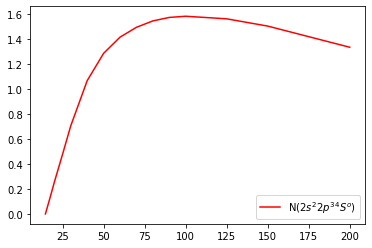

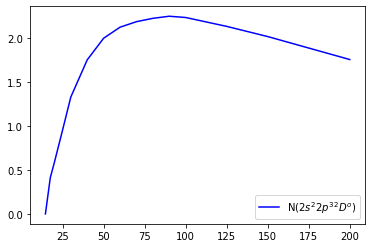

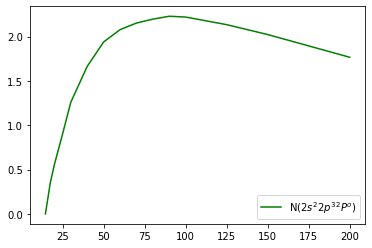

In [10]:
for i in range(1,4):
    data = np.loadtxt(tmpdir + "/N_2014_archive/ion_00" + str(i), skiprows=1, usecols=(0,1))
    filename = outdir+"ionization_" + n_states[i]
    scraper.writeDataToFile(data,filename + ".dat")
    scraper.writeMetaDataToFile(filename=filename + ".met",
                            specie="N",
                            process="ionization_partial",
                            units_e=1.0,
                            units_sigma=1.0E-20,
                                lhsA=n_states[i],
                                rhsA=np_states[i],
                            ref="wang2014",
                            background='From BSR calculations. Raw data provided by Zatsarinny.  Used predominate electronic state for N+ on RHS (ground state); however, there is significant 2s-ionization above 20 eV with ~15% contribution at 100 eV.')
    x,y = data.T
    if i == 3:
        i_max = 120
        x = x[:i_max]
        y = y[:i_max]
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    plot_symbols = ["r-", "b-", "g-"]
    plt.plot(x, y, plot_symbols[i-1], label = n_states_long[i])
    plt.legend(loc='lower right');
    plt.show() 

Momentum transfer
----------------------

Momentum transfer cross sections for electron impact with atomic nitrogen in the (2s$^2$2p$^3$) ${}^4S^o$ ground state, metastable (2s$^2$2p$^3$) ${}^2D^o$ state, and the metastable (2s$^2$2p$^3$) ${}^2P^o$ state.

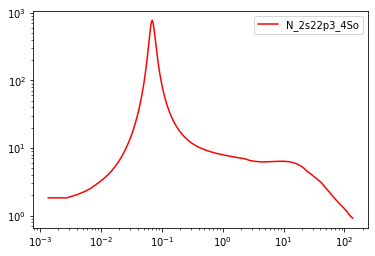

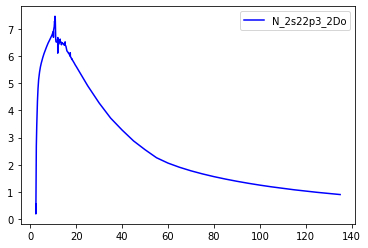

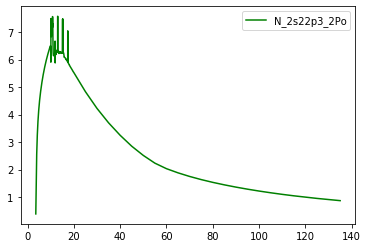

In [11]:
for i in range(1,4):
    data = np.loadtxt(tmpdir + "/N_2014_archive/mt_00" + str(i), skiprows=1, usecols=(0,1))
    filename = outdir+"momentum_transfer_" + n_states[i]
    scraper.writeDataToFile(data,filename + ".dat")
    scraper.writeMetaDataToFile(filename=filename + ".met",
                                specie="N",
                                process="momentum_partial",
                                units_e=1.0,
                                units_sigma=1.0E-20,
                                lhsA=n_states[i],
                                ref="wang2014",
                                background='From BSR calculations. Raw data provided by Zatsarinny.')
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    x,y = data.T
    plot_symbols = ["r-", "b-", "g-"]
    if i == 1:
        i_max = 300
        x = x[:i_max]
        y = y[:i_max]
        plt.loglog(x, y, plot_symbols[i-1], label = n_states[i])
    else:
        plt.plot(x, y, plot_symbols[i-1], label = n_states[i])
    plt.legend(loc='upper right');
    plt.show() 

Elastic Scattering
-----------

In [12]:
PLOT = False
for i in range(1,28):
    datafile = "/N_2014_archive/tr_" + '{0:03d}'.format(i) + "_" + '{0:03d}'.format(i)
    data = np.loadtxt(tmpdir + datafile, skiprows=1, usecols=(0,1))
    filename = outdir+"elastic_" + n_states[i]
    scraper.writeDataToFile(data, filename + ".dat")
    scraper.writeMetaDataToFile(filename=filename + ".met",
                            specie="N",
                            process="elastic_partial",
                            units_e=1.0,
                            units_sigma=1.0E-20,
                            lhsA=n_states[i],
                            rhsA=n_states[i],
                            ref="wang2014",
                            background='From BSR calculations. Raw data provided by Zatsarinny.')
    if PLOT:
        x,y = data.T
        fig = plt.figure()
        ax1 = fig.add_subplot(111)
        #plot_symbols = ["r-", "b-", "g-"]
        if i >= 3:
            i_max = 200
            x = x[:i_max]
            y = y[:i_max]
        if i== 0:
            i_max = 300
            x = x[:i_max]
            y = y[:i_max]
            plt.loglog(x, y, "b-", label = n_states[i])
        else:
            plt.plot(x, y, "r-", label = n_states[i])
        plt.legend(loc='upper right');
        plt.show() 

Excitation
-----------

In [13]:
PLOT = False
for i in range(1,27):
    for j in range(i+1, 28):
        datafile = "_". join([tmpdir + "/N_2014_archive/tr", '{0:03d}'.format(i), '{0:03d}'.format(j)])
        data = np.loadtxt(datafile, skiprows=1, usecols=(0,1))
        filename = "_".join([outdir + "/excitation", n_states[i], n_states[j]]) 
        scraper.writeDataToFile(data, filename + ".dat")
        scraper.writeMetaDataToFile(filename=filename + ".met",
                                specie="N",
                                process="excitation",
                                units_e=1.0,
                                units_sigma=1.0E-20,
                                lhsA=n_states[i],
                                rhsA=n_states[j],
                                ref="wang2014",
                                background='From BSR calculations. Raw data provided by Zatsarinny.')
        scraper.writeModelsToFile(filename=filename + ".mod", 
                                  modelsArray=["angus"])
        if PLOT:
            x,y = data.T
            fig = plt.figure()
            ax1 = fig.add_subplot(111)
            #plot_symbols = ["r-", "b-", "g-"]
            #if i >= 3:
            #    i_max = 200
            #    x = x[:i_max]
            #    y = y[:i_max]
            #if i== 0:
                #i_max = 150
                #x = x[:i_max]
                #y = y[:i_max]
            #    plt.loglog(x, y, "b-", label = n_states[i])
            #else:
            plt.plot(x, y, "r-", label = " ".join(["e$^-$ +", n_states_long[i]," --> e$^-$ +", n_states_long[j]]))
            plt.legend(loc='upper right');
            plt.show() 

In [14]:
#scraper.rmdir(tmpdir)